In [21]:
from matplotlib import pyplot as plt
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import random
from scipy.stats import ks_2samp
from utils import ( 
                    numerical_data_distribution_plot,
                    create_drift_metric_comparison_table_numerical,
                    create_bin_strategy_comparison_table_numerical,
                    create_comparison_with_evidently_table_numerical,
                    create_sample_size_comparison_table_numerical,
                    create_sample_size_bin_comparison_table_numerical,
             )
from yaml import safe_load
config = safe_load(open('config.yml','rb'))

In [22]:
observations = 100_000
distribution_selection = '1d'

In [23]:
print(f'Observations: {observations}')
print(f'Distribution Selection: {distribution_selection}')

if distribution_selection == '1a':
    description = 'Identlical Normal Distributions - No Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.random.normal(50, 15, observations) # identical with x

elif distribution_selection == '1b':
    description = 'Normal Distributions - Minimal Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.random.normal(51, 15, observations) # small drift 

elif distribution_selection == '1c':
    description = 'Normal Distributions - Small Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.random.normal(52, 15, observations) # small drift 

elif distribution_selection == '1d':
    description = 'Normal Distributions - Large Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.random.normal(60, 20, observations) # small drift 

elif distribution_selection == '1e':
    description = 'Normal Distributions - Very Large Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.random.normal(150, 15, observations) # small drift 

elif distribution_selection == '1f':
    description = 'Normal Distributions - Extreme Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.random.normal(1500, 15, observations) # small drift 

elif distribution_selection == '1g':
    description = 'Normal Distributions - No Drift - Different Scale'
    x = np.random.normal(50000, 1500, observations) # reference
    y = np.random.normal(50000, 1500, observations) # small drift 

elif distribution_selection == '2a':
    description = 'Normal Distributions with Outliers - Small Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.append(np.random.normal(50, 15, observations),np.random.normal(125,1,int(observations/100))) # same as reference with small amout of outliers

elif distribution_selection == '2b':
    description = 'Normal Distributions with Outliers - Some Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.append(np.random.normal(50, 15, observations),np.random.normal(125,1,int(observations/80))) # same as reference with a some of outliers

elif distribution_selection == '2c':
    description = 'Normal Distributions with Outliers - Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.append(np.random.normal(50, 15, observations),np.random.normal(125,1,int(observations/60))) # same as reference with some outliers

elif distribution_selection == '2d':
    description = 'Normal Distributions with Outliers - Drift'
    x = np.random.normal(50, 15, observations) # reference
    y = np.append(np.random.normal(50, 15, observations),np.random.normal(125,1,int(observations/40))) # same as reference with some outliers

elif distribution_selection == '3a':
    description = 'Identical Uniform Distributions - No Drift'
    x = np.random.uniform(10,50, observations) # reference
    y = np.random.uniform(10,50, observations) # small drift 

elif distribution_selection == '3b':
    description = 'Uniform Distributions with small excess in the upper range - Small Drift'
    x = np.random.uniform(10,50, observations) # reference
    y = np.append(np.random.uniform(10,50, int(observations*0.95)),np.random.uniform(20,50, int(observations*0.05)))  # small drift 

elif distribution_selection == '3c':
    description = 'Uniform Distributions with small excess in the upper range - Some Drift'
    x = np.random.uniform(10,50, observations) # reference
    y = np.append(np.random.uniform(10,50, int(observations*0.7)),np.random.uniform(20,50, int(observations*0.3)))  # some drift 

elif distribution_selection == '4a':
    description = 'Single Value - No Drift'
    x = np.full(observations,10) # single value
    y = np.full(observations,10) # same single value

elif distribution_selection == '4b':
    description = 'Single Value with some outliers - Drift'
    x = np.full(observations,10) # single value
    y = np.append(np.full(observations,10), np.full(int(observations/50),10.01)) # same single value with some outliers

elif distribution_selection == '4c':
    description = 'Differnt Single Values - Drift'
    x = np.full(observations,10) # single value
    y = np.full(observations,10.01) # single value



Observations: 100000
Distribution Selection: 1d


In [24]:
Markdown('# <strong>{}</strong><br/>'.format(description))

# <strong>Normal Distributions - Large Drift</strong><br/>

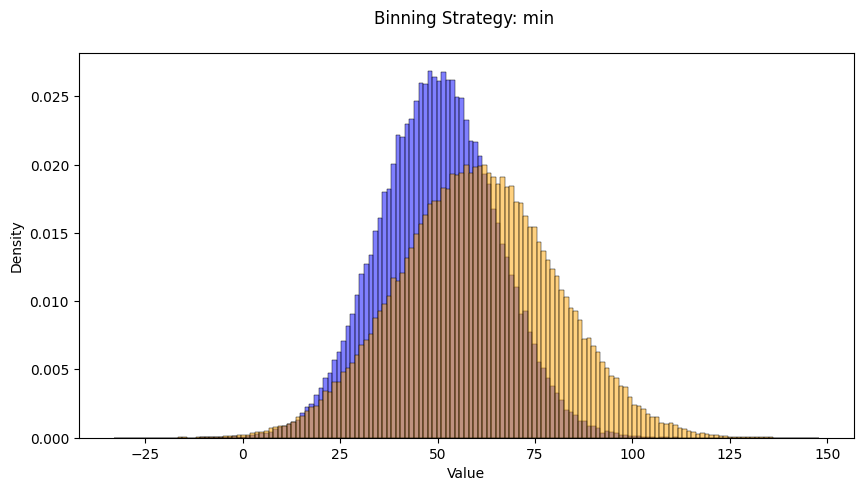

In [25]:
g = numerical_data_distribution_plot(x,y,bin_strategy='min')

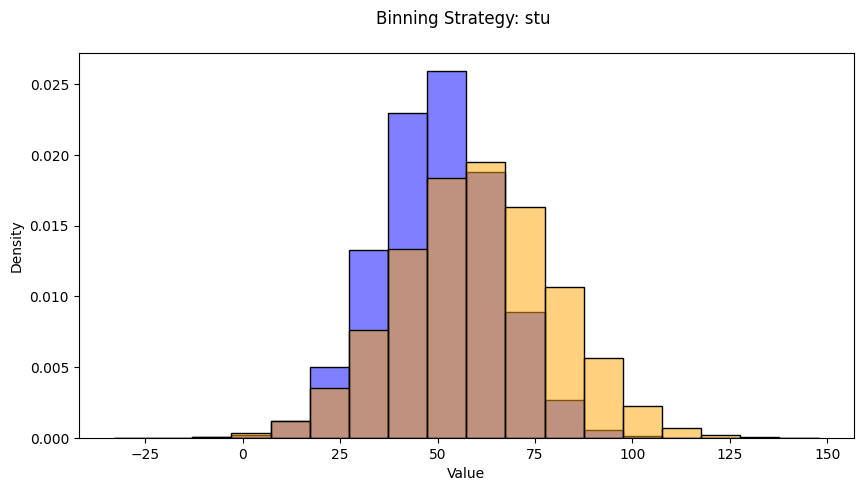

In [26]:
g = numerical_data_distribution_plot(x,y,bin_strategy='stu')

In [27]:
df = create_bin_strategy_comparison_table_numerical(x,y)
df

,stu,evi,min,max
Number of Bins,18.0000,19.0000,155.0000,207.0000
Jensen-Shannon Distance,0.2789,0.2790,0.2839,0.2841
Normed Wasserstein Distance,0.6786,0.6786,0.6786,0.6786
PSI,0.4974,0.4977,0.5078,0.5056
D_inf,0.0965,0.0890,0.0125,0.0094
KS Test,0.0000,0.0000,0.0000,0.0000


In [28]:
df = create_bin_strategy_comparison_table_numerical(x,y, output='drift_detection')
df

,stu,evi,min,max
Number of Bins,18,19,155,207
Jensen-Shannon Distance,drift detected,drift detected,drift detected,drift detected
Normed Wasserstein Distance,drift detected,drift detected,drift detected,drift detected
PSI,drift detected,drift detected,drift detected,drift detected
D_inf,drift detected,drift detected,no drift,no drift
KS Test,drift detected,drift detected,drift detected,drift detected


In [29]:
df = create_comparison_with_evidently_table_numerical(x,y)
df

,Local,Evidently
Jensen-Shannon Distance,0.2790,0.2323
Wasserstein Distance,0.6786,0.6786
PSI,0.4955,0.5214


In [30]:
df = create_sample_size_bin_comparison_table_numerical(x,y)
df

,stu,evi,min,max
Bins Full Sample,18,19,155,207
Bins 1/10th Sample,15,18,61,178
Bins 1/100th Sample,11,18,25,157
Bins 1/1000th Sample,8,18,13,147
"Bins 1/10,000th Sample",5,18,7,147


### Test Jensen-Shannon Distance

In [31]:
df = create_sample_size_comparison_table_numerical(x,y,"jensen_shannon_distance_numerical", output='distance')
df

,stu,evi,min,max
Full Sample,0.2789,0.2790,0.2839,0.2841
1/10th Sample,0.2773,0.2778,0.2820,0.2846
1/100th Sample,0.2712,0.2771,0.2802,0.3078
1/1000th Sample,0.2210,0.2533,0.2163,0.5309
"1/10,000th Sample",0.4864,0.5466,0.4864,0.8732


In [32]:
df = create_sample_size_comparison_table_numerical(x,y,"jensen_shannon_distance_numerical", output='drift_detection')
df

,stu,evi,min,max
Full Sample,drift detected,drift detected,drift detected,drift detected
1/10th Sample,drift detected,drift detected,drift detected,drift detected
1/100th Sample,drift detected,drift detected,drift detected,drift detected
1/1000th Sample,drift detected,drift detected,drift detected,drift detected
"1/10,000th Sample",drift detected,drift detected,drift detected,drift detected


 ### Test Wasserstein Distance

In [33]:
df = create_sample_size_comparison_table_numerical(x,y,"normed_wasserstein_distance_numerical", output='distance')
df

,stu,evi,min,max
Full Sample,0.6786,0.6786,0.6786,0.6786
1/10th Sample,0.6917,0.6917,0.6917,0.6917
1/100th Sample,0.6732,0.6732,0.6732,0.6732
1/1000th Sample,0.7853,0.7853,0.7853,0.7853
"1/10,000th Sample",0.3963,0.3963,0.3963,0.3963


In [34]:
df = create_sample_size_comparison_table_numerical(x,y,"normed_wasserstein_distance_numerical", output='drift_detection')
df

,stu,evi,min,max
Full Sample,drift detected,drift detected,drift detected,drift detected
1/10th Sample,drift detected,drift detected,drift detected,drift detected
1/100th Sample,drift detected,drift detected,drift detected,drift detected
1/1000th Sample,drift detected,drift detected,drift detected,drift detected
"1/10,000th Sample",drift detected,drift detected,drift detected,drift detected


### Test PSI

In [35]:
df = create_sample_size_comparison_table_numerical(x,y,"psi_numerical", output='distance')
df

,stu,evi,min,max
Full Sample,0.4974,0.4977,0.5078,0.5056
1/10th Sample,0.4811,0.4871,0.5014,0.5224
1/100th Sample,0.5994,0.6182,0.6697,1.0948
1/1000th Sample,0.9207,1.2664,1.0662,6.0007
"1/10,000th Sample",1.6256,5.7655,1.6256,65.7556


In [36]:
df = create_sample_size_comparison_table_numerical(x,y,"psi_numerical", output='drift_detection')
df

,stu,evi,min,max
Full Sample,drift detected,drift detected,drift detected,drift detected
1/10th Sample,drift detected,drift detected,drift detected,drift detected
1/100th Sample,drift detected,drift detected,drift detected,drift detected
1/1000th Sample,drift detected,drift detected,drift detected,drift detected
"1/10,000th Sample",drift detected,drift detected,drift detected,drift detected


### Test D_inf

In [37]:
df = create_sample_size_comparison_table_numerical(x,y,"d_inf_numerical", output='distance')
df

,stu,evi,min,max
Full Sample,0.0965,0.0890,0.0125,0.0094
1/10th Sample,0.0914,0.0846,0.0258,0.0101
1/100th Sample,0.1370,0.0970,0.0634,0.0143
1/1000th Sample,0.1826,0.1047,0.1070,0.0373
"1/10,000th Sample",0.5735,0.2913,0.3153,0.0982


In [38]:
df = create_sample_size_comparison_table_numerical(x,y,"d_inf_numerical", output='drift_detection')
df

,stu,evi,min,max
Full Sample,drift detected,drift detected,no drift,no drift
1/10th Sample,drift detected,drift detected,drift detected,no drift
1/100th Sample,drift detected,drift detected,drift detected,no drift
1/1000th Sample,drift detected,drift detected,drift detected,drift detected
"1/10,000th Sample",drift detected,drift detected,drift detected,drift detected


### Test KS Test

In [39]:
df = create_sample_size_comparison_table_numerical(x,y,"two_sample_ks_test_numerical", output='distance')
df

,stu,evi,min,max
Full Sample,0.0000,0.0000,0.0000,0.0000
1/10th Sample,0.0000,0.0000,0.0000,0.0000
1/100th Sample,0.0000,0.0000,0.0000,0.0000
1/1000th Sample,0.0000,0.0000,0.0000,0.0000
"1/10,000th Sample",0.0806,0.0806,0.0806,0.0806


In [40]:
df = create_sample_size_comparison_table_numerical(x,y,"two_sample_ks_test_numerical", output='drift_detection')
df

,stu,evi,min,max
Full Sample,drift detected,drift detected,drift detected,drift detected
1/10th Sample,drift detected,drift detected,drift detected,drift detected
1/100th Sample,drift detected,drift detected,drift detected,drift detected
1/1000th Sample,drift detected,drift detected,drift detected,drift detected
"1/10,000th Sample",drift detected,drift detected,drift detected,drift detected
